# 21M.387 Fundamentals of Music Processing
## Lab3

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp


%matplotlib inline
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (12, 4)

## Exercise 1

You should be comfortable with numpy vectors at this point. We'll now look at matrices in numpy.

You can create a matrix explicitly as shown below. You can also ask a matrix for its dimensions with `shape` (this is a property, not a function).

In [2]:
a = np.array( ((1,2,3,4), (5,6,7,8), (9,10,11,12)) )
print a
print 'shape is', a.shape

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
shape is (3, 4)


As you can see, the dimensions of a matrix are always: Rows x Columns.

You can do matrix indexing and slicing very similarly to vector slicing.  
A colon by itself (`:`) selects an entire row or column.

In [ ]:
print 'a[1,2] = ', a[1,2]
print 'a[0:2,1:3] =\n', a[0:2,1:3]
print 'a[2, :] = ', a[2, :]
print 'a[:, 2] = ', a[:, 2], 'prints horizontally, as a vector'

- Create a 4x6 matrix of random numbers (set it to `a`).
- Set the corners of the matrix to be the numbers 1,2,3,4 clockwise from the top-left.
- Set that matrix's 2nd row to be all zeros
- Set that matrix's 3rd column to be all ones.

In [33]:
a = np.random.rand(4,6)
y,x = a.shape
print a
a[0,0],a[0,-1],a[-1,-1],a[-1,0] = 1,2,3,4
print a
a[1,:] = 0
print a
a[:,[2]] = 1
print a



[[ 0.43229981  0.87794263  0.75015728  0.22478906  0.95866498  0.92327242]
 [ 0.80449858  0.18481946  0.62401151  0.35888467  0.83570338  0.74982613]
 [ 0.03377168  0.89613379  0.95792287  0.52861389  0.73925761  0.87967331]
 [ 0.36040886  0.55218692  0.01783337  0.65405141  0.47057471  0.66288532]]
[[ 1.          0.87794263  0.75015728  0.22478906  0.95866498  2.        ]
 [ 0.80449858  0.18481946  0.62401151  0.35888467  0.83570338  0.74982613]
 [ 0.03377168  0.89613379  0.95792287  0.52861389  0.73925761  0.87967331]
 [ 4.          0.55218692  0.01783337  0.65405141  0.47057471  3.        ]]
[[ 1.          0.87794263  0.75015728  0.22478906  0.95866498  2.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.03377168  0.89613379  0.95792287  0.52861389  0.73925761  0.87967331]
 [ 4.          0.55218692  0.01783337  0.65405141  0.47057471  3.        ]]
[[ 1.          0.87794263  1.          0.22478906  0.95866498  2.        ]
 [ 0.          0.     

## Exercise 2

Let's plot that matrix. For each of these plots, make a new figure so you can see all of them at once.

- First, just use `plt.plot(a)`. Probably not what you wanted.
- Now use `plt.imshow(a)`. Pretty!
- Add to `imshow()` the optional argument `interpolation='nearest'`
- Add to `imshow()` the optional argument `origin='lower'`
- Finally, add a colorbar: `plt.colorbar()`


<IPython.core.display.Javascript object>


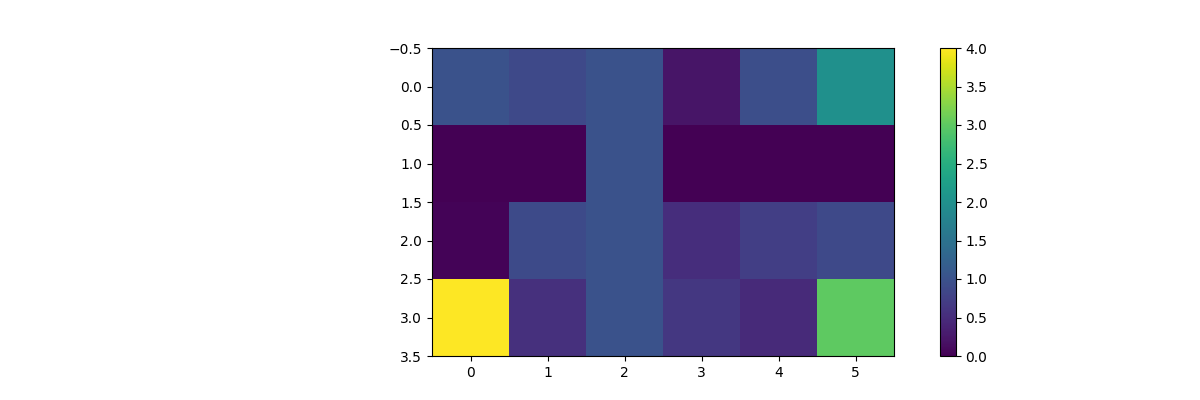

In [38]:
#plt.plot(a)
plt.figure()
#plt.imshow(a,interpolation='nearest', origin='lower')
plt.imshow(a,interpolation='nearest')
plt.colorbar()


## Exercise 3

- Load the small bit of audio below.
- Plot it.
- Identify the approximate start location of the first note ($n_1$). Actually, make $n_1$ a bit later than the exact start, so that you are past the note's transient.
- Create $x$: a window of length $N=1024$ starting at $n_1$ of the audio.
- Plot $x$.
- Create $x_w$: $x$ multiplied by a Hann window of the same length (see `np.hanning()`).
- Plot $x_w$.


<IPython.core.display.Javascript object>


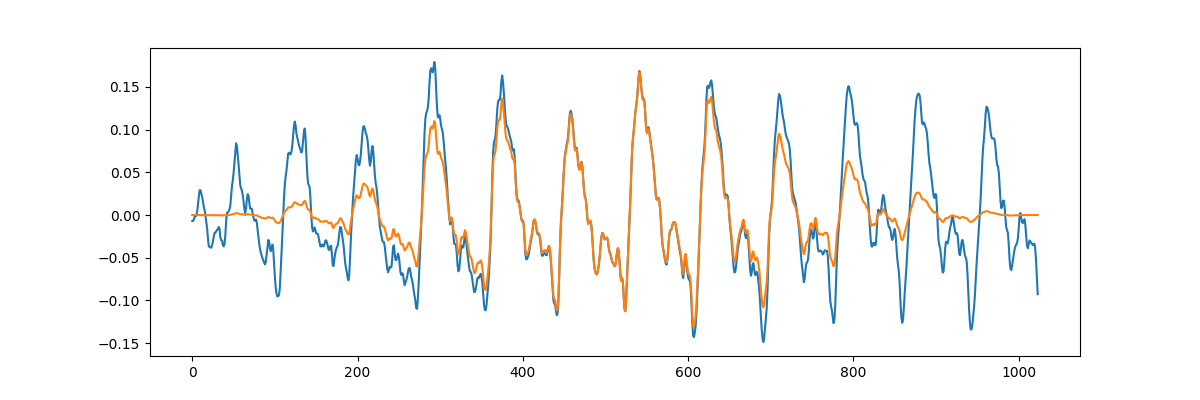

In [41]:
snd = load_wav("audio/piano_arpeg.wav")
fs = 22050

#plt.figure()
#plt.plot(snd)

n1 = 1475
N = 1024
x = snd[n1:n1+N]

plt.figure()
plt.plot(x)
xw = x*np.hanning(N)
plt.plot(xw)



## Exercise 4

- Create  $\lvert X \lvert$, the magnitude of the first 1/2 of DFT of $x_w$. [Hint, use `np.fft.rfft`].
- Plot it.
- Find the top peaks of this signal (using `find_peaks`). You may need to play around with `thresh` to get only the highest 4 or 5 peaks of $\lvert X \lvert$.


<IPython.core.display.Javascript object>


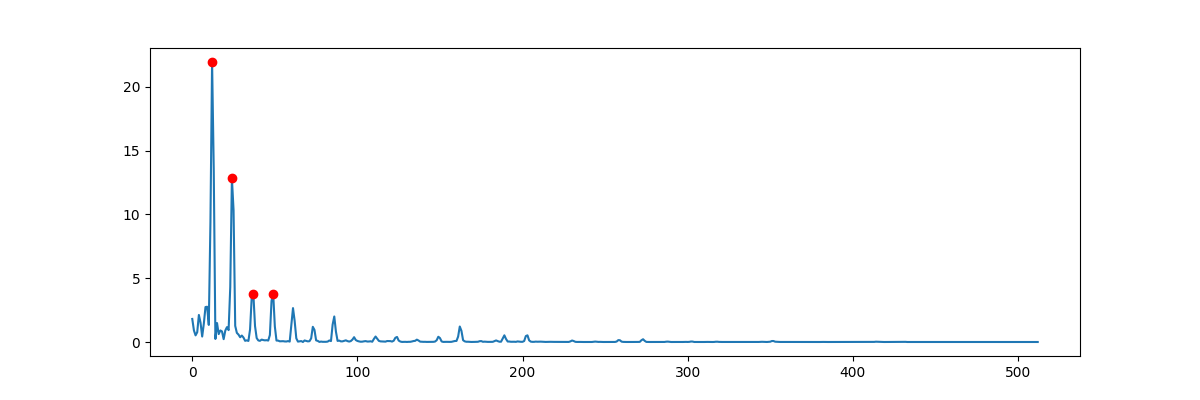

In [80]:
fft_mag = abs(np.fft.rfft(xw))
plt.figure()
plt.plot(fft_mag)

peaks = find_peaks(fft_mag, thresh=0.15)
plt.plot(peaks, fft_mag[peaks], 'ro')


## Exercise 5

- Write the function `bin_to_freq` which returns the frequency of a given FFT bin ($k$). This function should work with input that are scalars or vectors. [Hints, what other inputs are needed?, make sure to do floating point math]
- Print the frequencies of the peaks of your DFT.
- Write the function `freq_to_pitch` which returns the midi pitch (as a floating point value) from a given frequency. 
- Print the midi pitches of the peaks of your DFT.

Since that first note is a middle C played on piano, the first 4 pitches should correspond roughly to the first 4 harmonics: C4, C5, G5, C6.

 {\displaystyle d=69+12\log _{2}\left({\frac {f}{440\ \mathrm {Hz} }}\right).\,}

In [86]:
def bin_to_freq(k,fs,N):
    return k*fs/np.float(N)

freqs = bin_to_freq(peaks,fs,N)
print freqs

def freq_to_pitch(f):
    return 69.0+12.0*np.log(f/440.0)/np.log(2.0)

print map(lambda f:freq_to_pitch(f), freqs)


[  258.3984375    516.796875     796.72851562  1055.12695312]
[59.785125870344899, 71.785125870344899, 79.279016249238424, 84.142093991073523]


## Exercise 6

The frequency resolution of the DFT with the current $N$ is not that good. You can see that the pitches are not very accurate.

One way to help this is to increase $N$. In this exercise, let's increase $N$ by zero-padding the original $x_w$.

- Create a function `zpad` that zero-pads a vector to new length $N_{zp}$. You can use `np.concatenate`
- Repeat this process (Exercises 5 and 6) to arrive at a set of midi pitch values for that original signal $x_w$, while trying out increasing values of $N_{zp}$. It is generally good practice (but not mandatory) that $N_{zp}$ be a power of 2.

Do you observe the accuracy getting better?  
Do you get to a point where increasing $N_{zp}$ stops improving the accurate of the results?


In [112]:
def zpad(xw, Nzp):
    assert len(xw) <= Nzp
    return np.concatenate([x,np.zeros(Nzp - len(xw))])
    
def nzp_to_pitch(Nzp, xw):
    xzp = zpad(xw,Nzp)
    Xzp = abs(np.fft.rfft(xzp))
    peaks = find_peaks(Xzp, thresh=0.15)
    freqs = bin_to_freq(peaks,fs,Nzp)
    #pitches = map(lambda f:freq_to_pitch(f), freqs)
    pitches = freq_to_pitch(freqs)
    print pitches
    """
    plt.figure()
    plt.plot(xzp)
    
    plt.figure()
    plt.plot(Xzp)
    plt.plot(peaks,xzp[peaks],'ro')
    plt.show()
    """
    
    
@interact(m = (0,10) )
def foo(m=0):
    nzp_to_pitch(2**(m+10),xw)
    

[  89.81512996   90.80467588   91.74070602   92.41094484   93.05619992
   95.96452997   96.3178553    97.00358219   98.14189242   99.2099525
   99.64826301  100.07574993  100.49293494  100.90030293  101.55864615
  101.94196086  102.31697207  102.80467588  103.161644    103.74070602
  103.96701435  104.41094484  104.7365784   105.05619992  105.26604904
  105.88075292  106.1801092   106.76372651  107.42064208  107.87506031
  108.05353963  108.40507131  108.57819616  109.00358219  109.50062132
  109.74389006  110.29856626  110.83602132  111.1358096   111.35729245
  111.57597756  111.79193471  112.14598264  112.35498728  112.56149876]


## Exercise 7

Now let's increase $N$ in a different way - by using a larger initial window (grabbing a larger portion of the audio).
Start with the same `snd`, but this time slice off a larger and larger portion of the first note as you apply the process of Exercise 4 - 5.

In [ ]:
# answer:
